In [1]:
from music21 import *

# Notenanzeige einrichten

Möglicherweise funktioniert die Anzeige von Noten nicht per default. Das lässt sich aber recht einfach beheben. Grundlegend funktioniert das mit (fast) jeder Notationssoftware, der Einfachkeit halber werd ich hier aber nur auf MuseScore (Open Source) eingehen, die Schritte sollten aber universal funktionieren.

MuseScore kann man hier kostenlos herunterladen: https://musescore.org/

Zuerst geben wir die eingestellten Pfade aus:

In [2]:
# Usersettings laden
us = environment.UserSettings()

# die beiden relevanten Einstellungen ausgeben
print(us['musicxmlPath'])
print(us['musescoreDirectPNGPath'])

/usr/bin/musescore
/usr/bin/musescore


Die eingestellten Pfade sollten auf die Executable der jeweiligen Notationssoftware zeigen. Hier sind die Betriebssystemspezifischen Standardpfade (die ggf. schon eingestellt sind):

* Linux: `/usr/bin/musescore`
* MacOs: `/Application/MuseScore 3.app/Contents/MacOs/mscore`
* Windows: `C:\Programme\MuseScore\mscore.exe`

Falls die Notationssoftware nicht in dem Standardpfad installiert sein sollte, so muss dieser natürlich entsprechend angepasst werden.

Zum Ändern die entsprechenden Zeilen auskommentieren und die Zelle ausführen.

In [3]:
# Linux:
# us['musicxmlPath'] = '/usr/bin/musescore'
# us['musescoreDirectPNGPath']= '/usr/bin/musescore'

# MacOs:
# us['musicxmlPath'] = '/Application/MuseScore 3.app/Contents/MacOs/mscore'
# us['musescoreDirectPNGPath']= '/Application/MuseScore 3.app/Contents/MacOs/mscore'

# Windows:
# us['musicxmlPath'] = 'C:\Programme\MuseScore\mscore.exe'
# us['musescoreDirectPNGPath']= 'C:\Programme\MuseScore\mscore.exe'

# Harmonische Analyse

Als Grundlage für die harmonische Analyse nehmen wir einen vierstimmigen Schlusschoral "Alleluja" aus der Kantate "Erfreut euch, ihr Herzen" (BWV 66) von J. S. Bach.

Zuerst laden wir es und lassen es anzeigen:

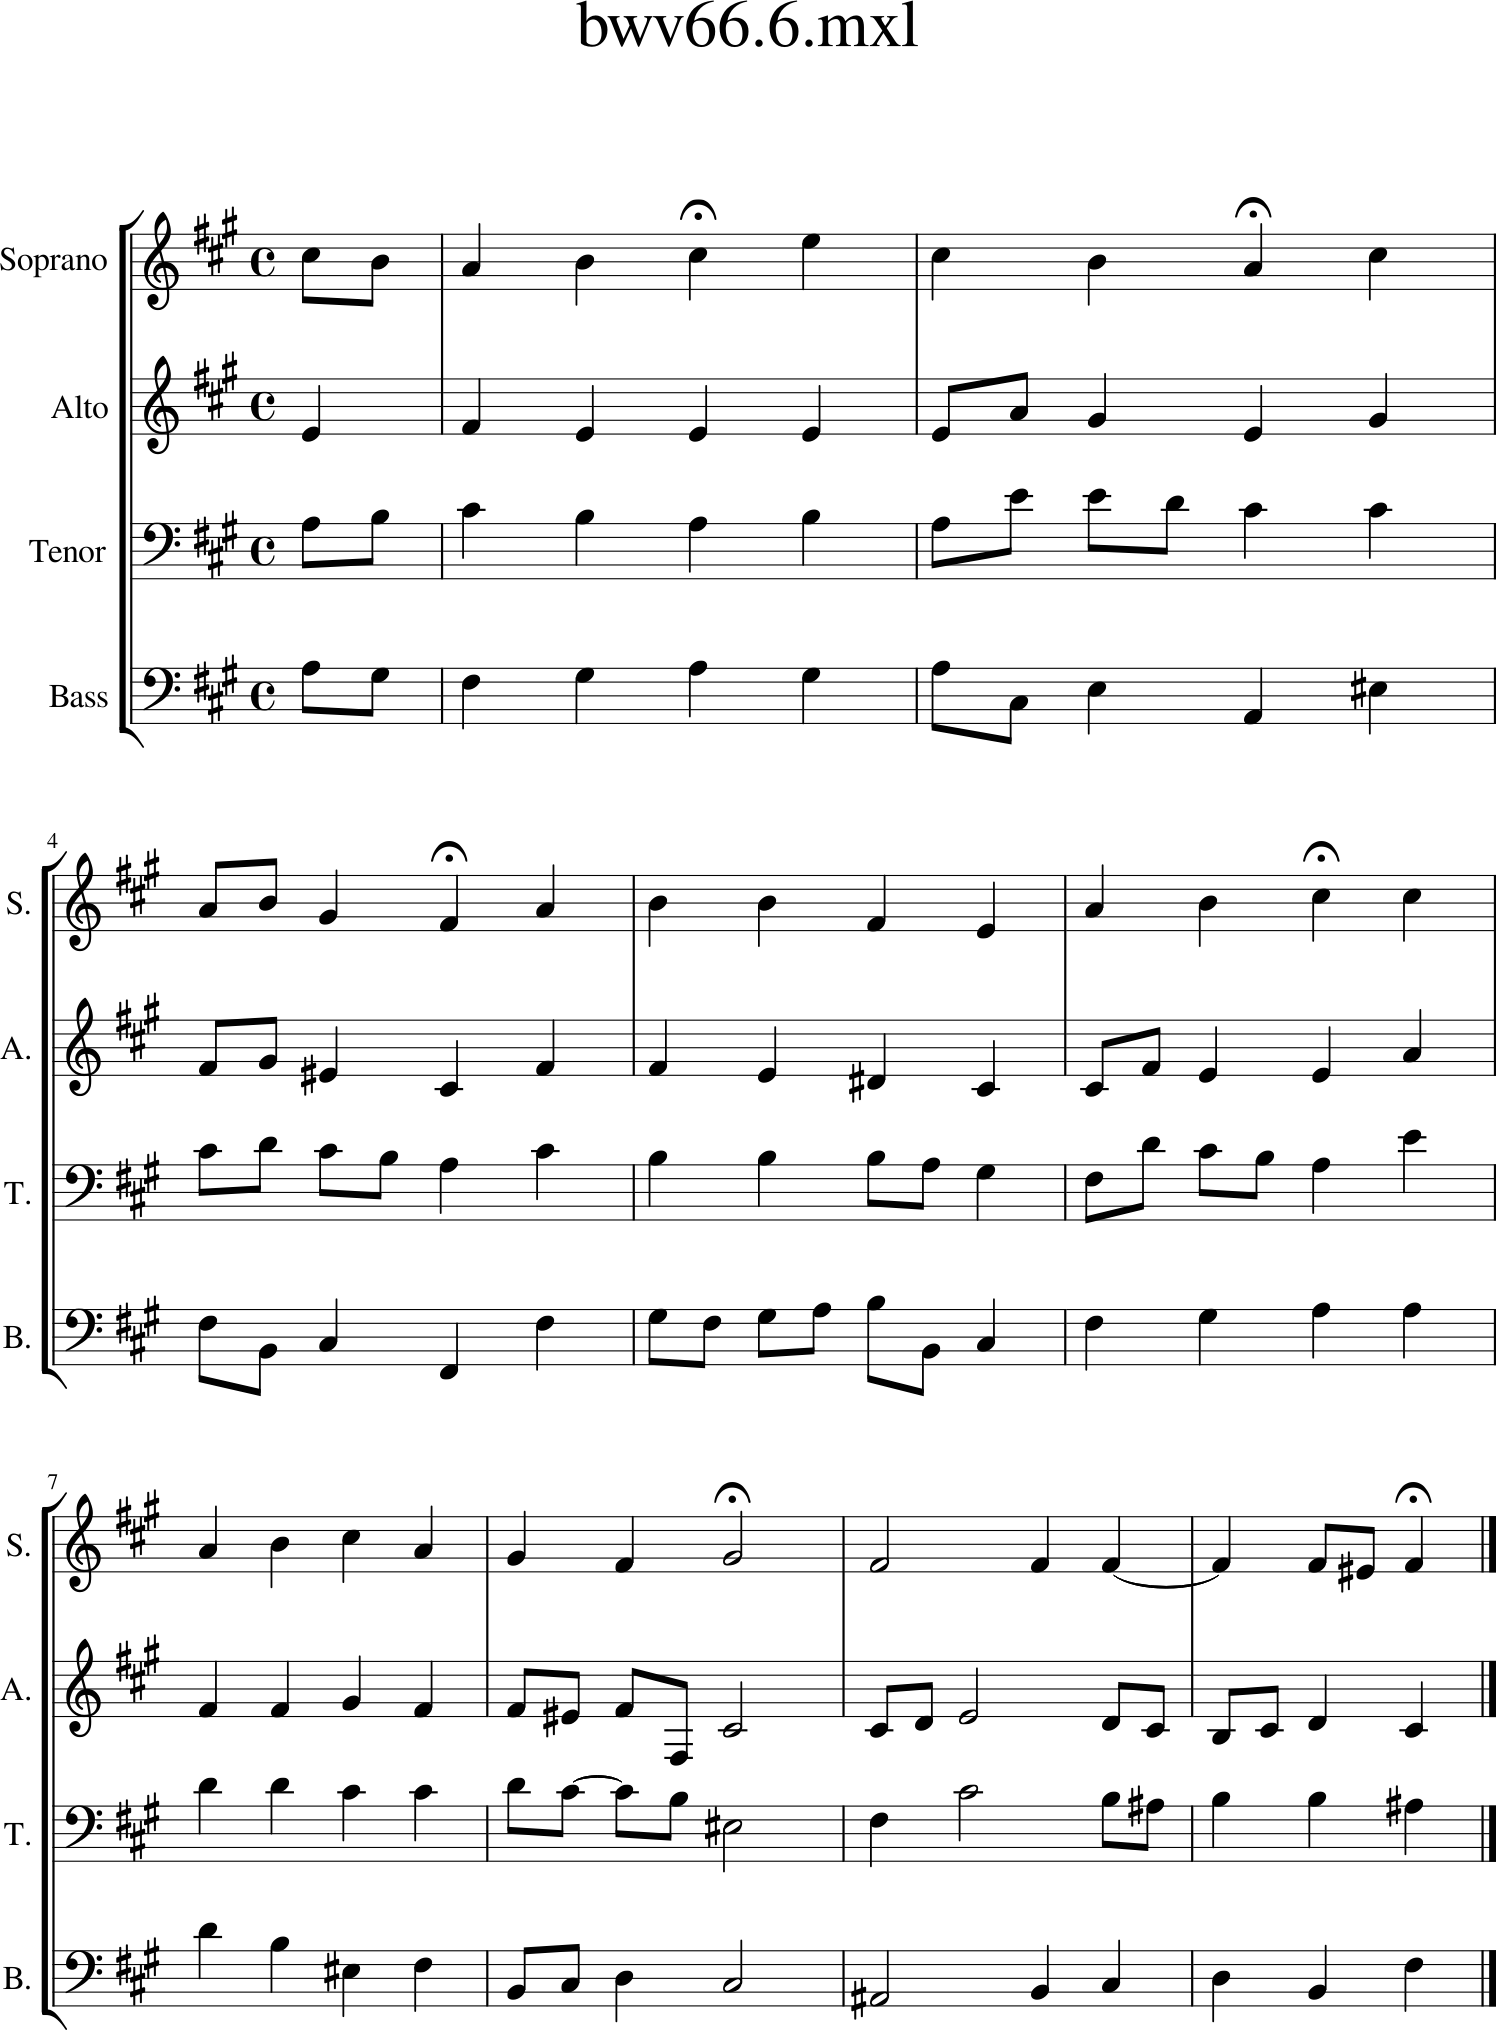

In [4]:
s = corpus.parse('bwv66.6')
s.show()

Anschließend fassen wir alle Stimmen zu Akkorden zusammen und speichern diese in einem neuen Stream.

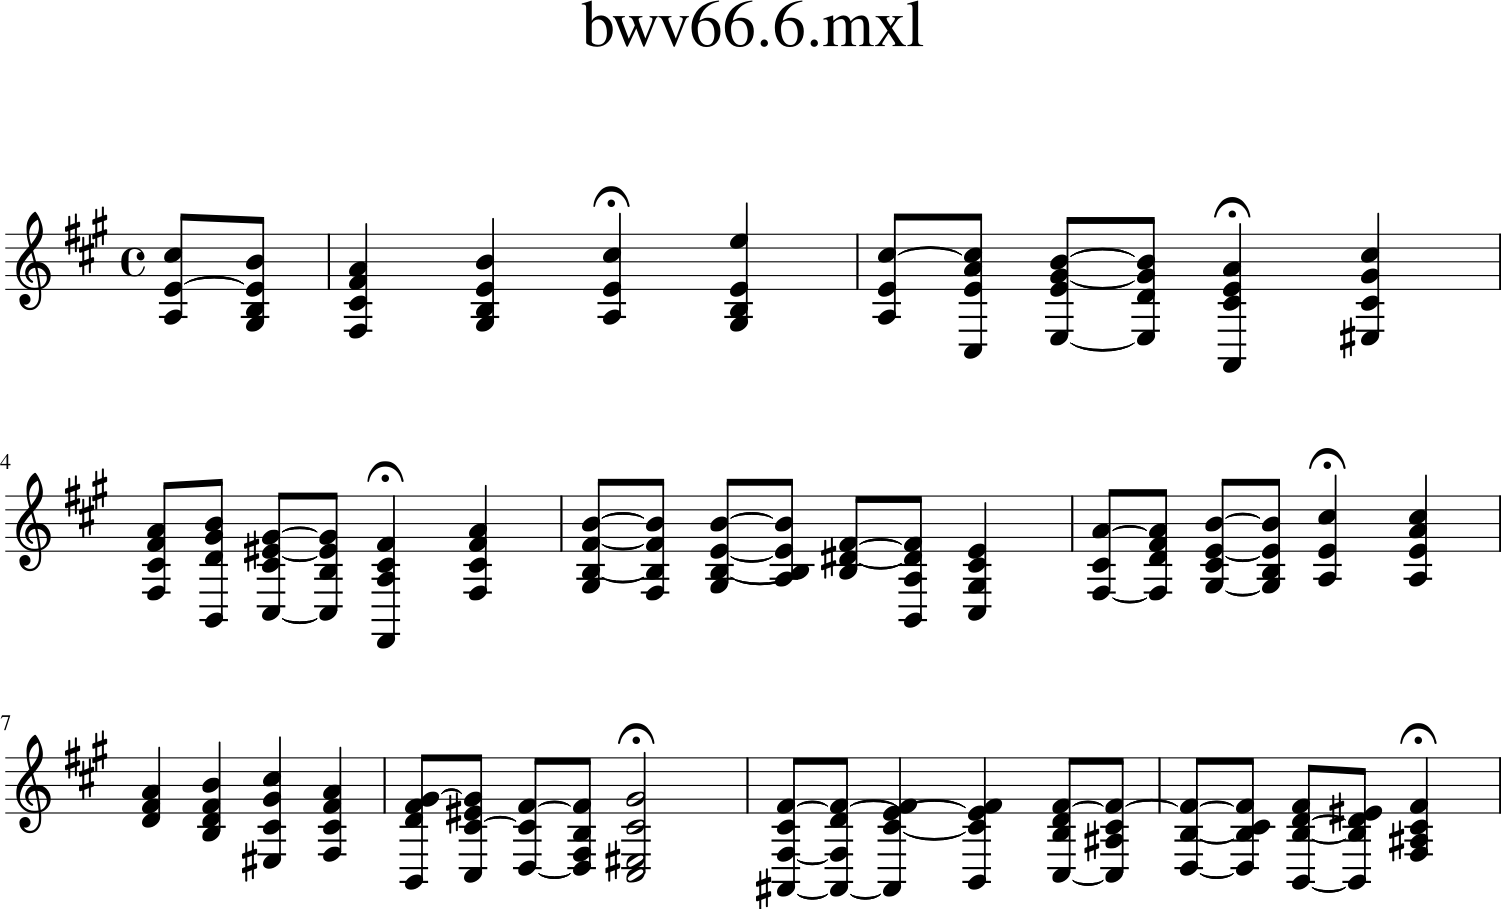

In [5]:
sChords = s.chordify()
sChords.show()

In [6]:
sChords.show('text')

{0.0} <music21.metadata.Metadata object at 0x7f7cac5b7850>
{0.0} <music21.instrument.Instrument 'P1: Soprano: Instrument 1'>
{0.0} <music21.stream.Measure 0 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.Key of f# minor>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.chord.Chord A3 E4 C#5>
    {0.5} <music21.chord.Chord G#3 B3 E4 B4>
{1.0} <music21.stream.Measure 1 offset=1.0>
    {0.0} <music21.chord.Chord F#3 C#4 F#4 A4>
    {1.0} <music21.chord.Chord G#3 B3 E4 B4>
    {2.0} <music21.chord.Chord A3 E4 C#5>
    {3.0} <music21.chord.Chord G#3 B3 E4 E5>
{5.0} <music21.stream.Measure 2 offset=5.0>
    {0.0} <music21.chord.Chord A3 E4 C#5>
    {0.5} <music21.chord.Chord C#3 E4 A4 C#5>
    {1.0} <music21.chord.Chord E3 E4 G#4 B4>
    {1.5} <music21.chord.Chord E3 D4 G#4 B4>
    {2.0} <music21.chord.Chord A2 C#4 E4 A4>
    {3.0} <music21.chord.Chord E#3 C#4 G#4 C#5>
{9.0} <music21.stream.Measure 3 offset=9.0>
    {0.0} <music21.layout.SystemLayout>
  

Nun entfernen wir alle Measure-Objekte aus dem Stream (bzw. flachen die Hierarchie ab).

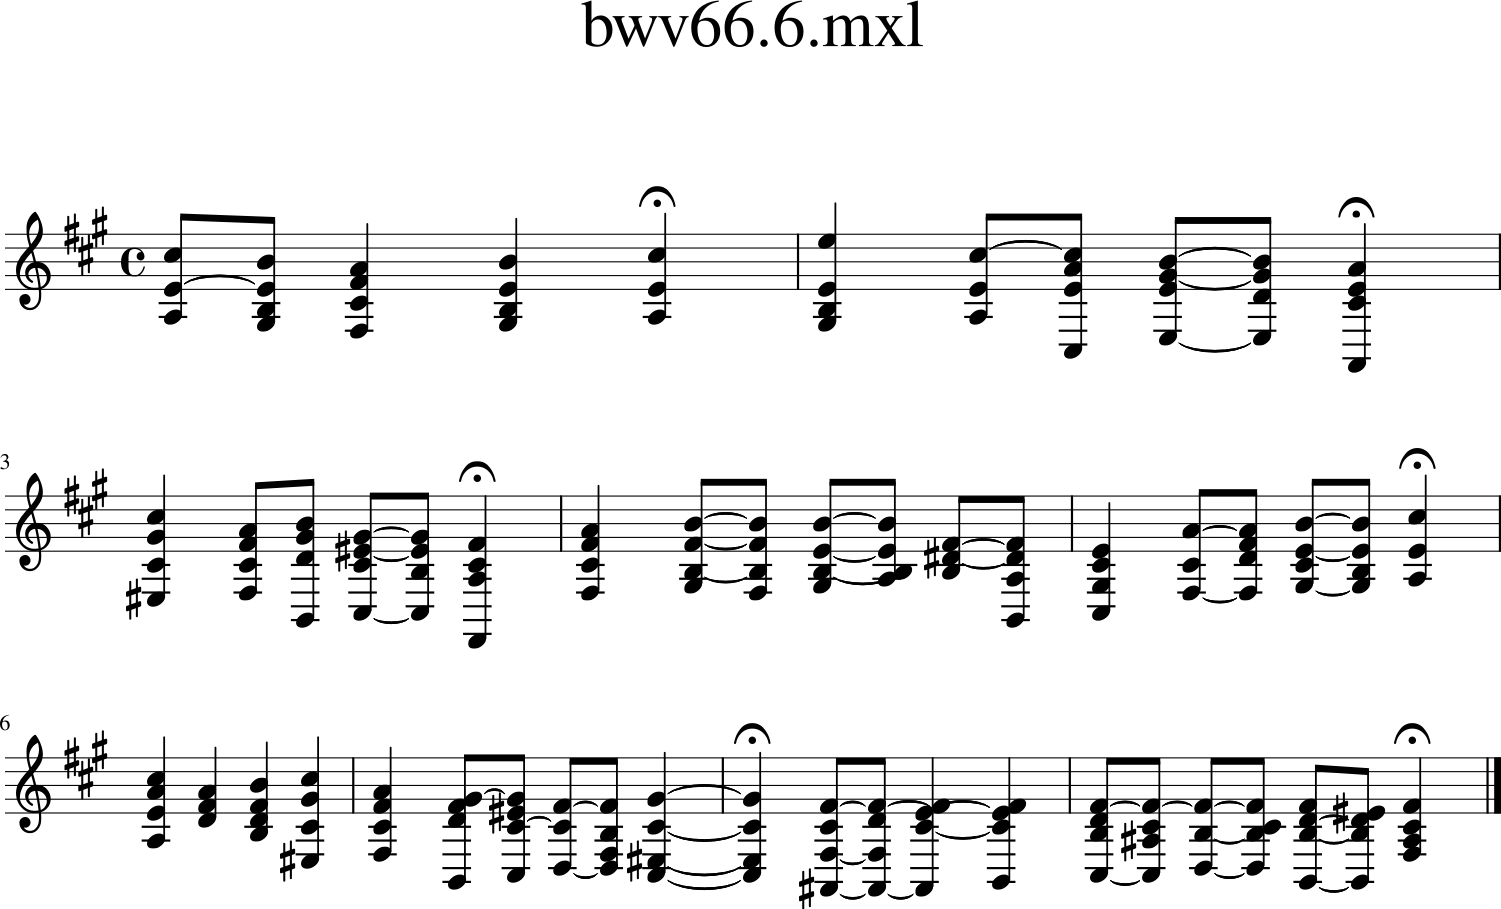

In [7]:
sFlat = sChords.flat
sFlat.show()

In der Textausgabe ist nun deutlich zu sehen, dass die Verschachtelung in Takte aufgelöst wurde.

In [8]:
sFlat.show('text')

{0.0} <music21.metadata.Metadata object at 0x7f7cac5b7850>
{0.0} <music21.instrument.Instrument 'P1: Soprano: Instrument 1'>
{0.0} <music21.clef.TrebleClef>
{0.0} <music21.key.Key of f# minor>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.chord.Chord A3 E4 C#5>
{0.5} <music21.chord.Chord G#3 B3 E4 B4>
{1.0} <music21.chord.Chord F#3 C#4 F#4 A4>
{2.0} <music21.chord.Chord G#3 B3 E4 B4>
{3.0} <music21.chord.Chord A3 E4 C#5>
{4.0} <music21.chord.Chord G#3 B3 E4 E5>
{5.0} <music21.chord.Chord A3 E4 C#5>
{5.5} <music21.chord.Chord C#3 E4 A4 C#5>
{6.0} <music21.chord.Chord E3 E4 G#4 B4>
{6.5} <music21.chord.Chord E3 D4 G#4 B4>
{7.0} <music21.chord.Chord A2 C#4 E4 A4>
{8.0} <music21.chord.Chord E#3 C#4 G#4 C#5>
{9.0} <music21.layout.SystemLayout>
{9.0} <music21.chord.Chord F#3 C#4 F#4 A4>
{9.5} <music21.chord.Chord B2 D4 G#4 B4>
{10.0} <music21.chord.Chord C#3 C#4 E#4 G#4>
{10.5} <music21.chord.Chord C#3 B3 E#4 G#4>
{11.0} <music21.chord.Chord F#2 A3 C#4 F#4>
{12.0} <music21.chord.Cho

Da wir für die harmonische Analyse nur die Akkorde benötigen filtern wir nur diese raus.

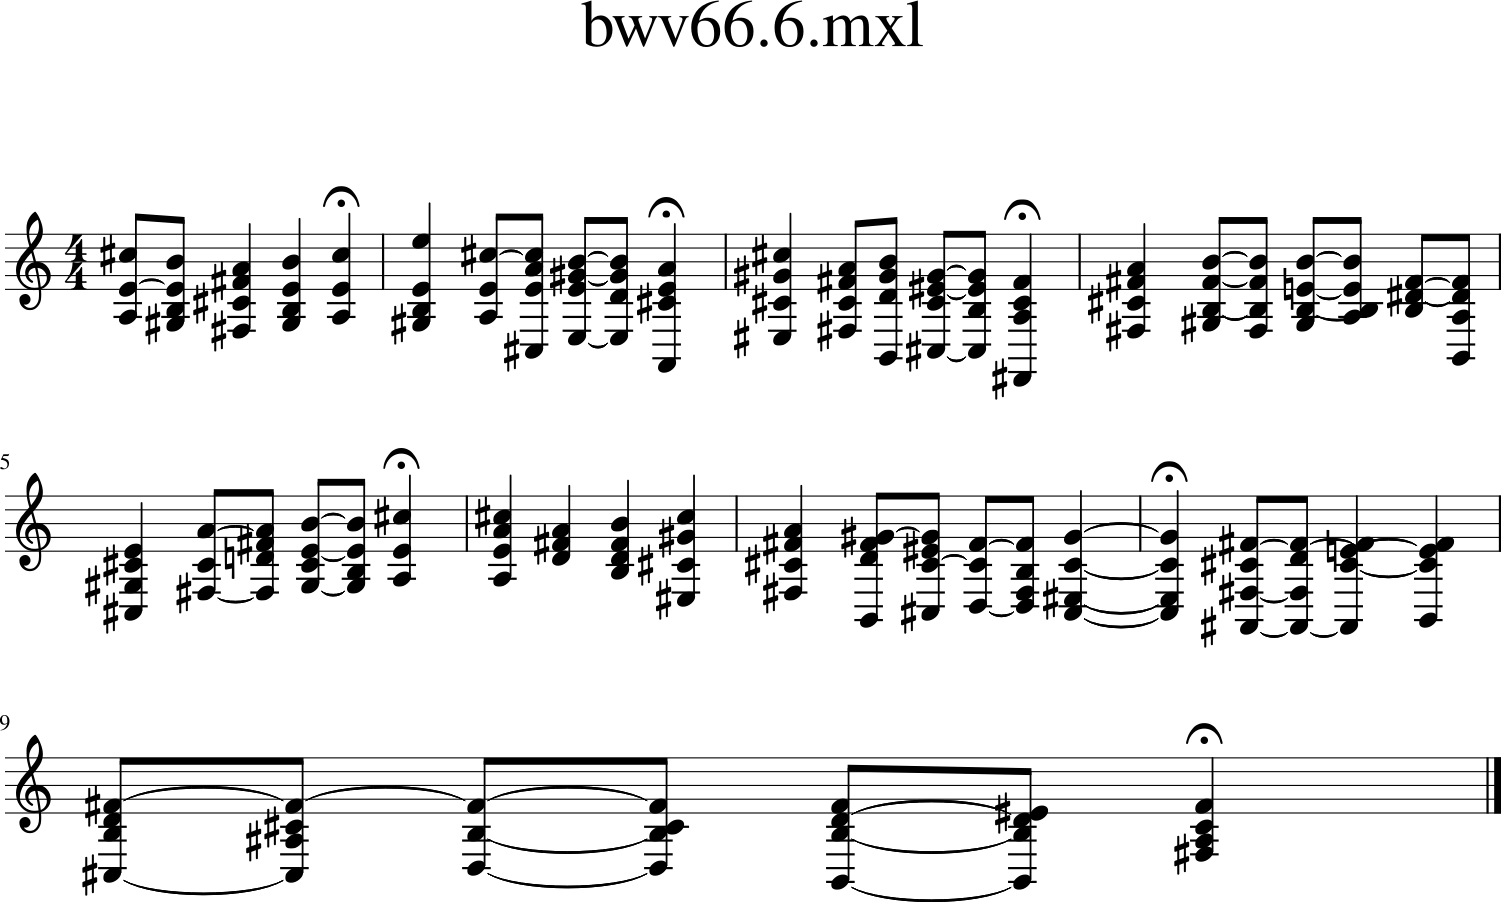

In [9]:
sOnlyChords = sFlat.getElementsByClass('Chord')
sOnlyChords.show()

In [10]:
sOnlyChords.show('text')

{0.0} <music21.chord.Chord A3 E4 C#5>
{0.5} <music21.chord.Chord G#3 B3 E4 B4>
{1.0} <music21.chord.Chord F#3 C#4 F#4 A4>
{2.0} <music21.chord.Chord G#3 B3 E4 B4>
{3.0} <music21.chord.Chord A3 E4 C#5>
{4.0} <music21.chord.Chord G#3 B3 E4 E5>
{5.0} <music21.chord.Chord A3 E4 C#5>
{5.5} <music21.chord.Chord C#3 E4 A4 C#5>
{6.0} <music21.chord.Chord E3 E4 G#4 B4>
{6.5} <music21.chord.Chord E3 D4 G#4 B4>
{7.0} <music21.chord.Chord A2 C#4 E4 A4>
{8.0} <music21.chord.Chord E#3 C#4 G#4 C#5>
{9.0} <music21.chord.Chord F#3 C#4 F#4 A4>
{9.5} <music21.chord.Chord B2 D4 G#4 B4>
{10.0} <music21.chord.Chord C#3 C#4 E#4 G#4>
{10.5} <music21.chord.Chord C#3 B3 E#4 G#4>
{11.0} <music21.chord.Chord F#2 A3 C#4 F#4>
{12.0} <music21.chord.Chord F#3 C#4 F#4 A4>
{13.0} <music21.chord.Chord G#3 B3 F#4 B4>
{13.5} <music21.chord.Chord F#3 B3 F#4 B4>
{14.0} <music21.chord.Chord G#3 B3 E4 B4>
{14.5} <music21.chord.Chord A3 B3 E4 B4>
{15.0} <music21.chord.Chord B3 D#4 F#4>
{15.5} <music21.chord.Chord B2 A3 D#4 F#4

Nun erstellen wir einen neuen Stream, in dem wir die Akkorde bzw. Akkordfolgen, die wir analysieren bzw. anzeigen wollen, speichern.

In [11]:
displayPart = stream.Part(id='displayPart')
displayPart

<music21.stream.Part displayPart>

Folgende Analyse wollen wir durchführen:
*  Dreiklänge oder Septakkorde mit Grundton A und den jeweiligen Folgeakkord auf Stufen analysieren
* Die beiden Akkorde in den neuen Stream kopieren, jedes Akkordpaar in einen neuen Takt
* Die jeweiligen Stufen analysieren (mit A als I. Stufe)

Um den Code geordneter und lesbarer zu gestalten erstellen wir eine Hilfsfunktion, die als Parameter zwei Akkorde übergeben bekommt. Der erste wird überprüft, ob er ein Dreiklang oder Septakkord ist und ob sein Grundton A ist. Sollte das nicht zutreffen, so wird nichts zurückgegeben, da der Akkord für unsere Analyse nicht relevant ist. Sollte es aber zutreffen, so werden beide Akkorde in die enge Lage und vierte Oktave (~ Violinschlüssel) gesetzt. Anschließend wird ein neuer Takt erstellt und dem oben erstellten Stream `displayPart` hinzugefügt.

In [12]:
# Hilfsfunktion
def appendChordPairs(thisChord, nextChord):
    if (thisChord.isTriad() is True or thisChord.isSeventh() is True) and \
          thisChord.root().name == 'A':
        
        # Akkorde in enge Lage und vierte Oktave setzen
        closePositionThisChord = thisChord.closedPosition(forceOctave=4)
        closePositionNextChord = nextChord.closedPosition(forceOctave=4)
        
        # Neuen Takt erstellen und diesen zu displayPart hinzufügen
        m = stream.Measure()
        m.append(closePositionThisChord)
        m.append(closePositionNextChord)
        displayPart.append(m)

Nun gehen wir in einer Schleife über alle Akkorde (bis auf den letzten) und übergeben der Hilfsfunktion den aktuellen und den nachfolgenden Takt.

In [13]:
for i in range(len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    
    appendChordPairs(thisChord, nextChord)

Wenn wir uns jetzt `displayPart` ausgeben, so sehen wir die Akkordpaare in jeweils eigenen Takten (der erste Akkord sollte immer den Grundton A haben).

In [14]:
print('Anzahl der gefundenen Paare:', len(displayPart))
displayPart.show('text')

Anzahl der gefundenen Paare: 7
{0.0} <music21.stream.Measure 0 offset=0.0>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {0.5} <music21.chord.Chord G#4 B4 E5>
{1.0} <music21.stream.Measure 0 offset=1.0>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {1.0} <music21.chord.Chord G#4 B4 E5>
{3.0} <music21.stream.Measure 0 offset=3.0>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {0.5} <music21.chord.Chord C#4 E4 A4>
{4.0} <music21.stream.Measure 0 offset=4.0>
    {0.0} <music21.chord.Chord C#4 E4 A4>
    {0.5} <music21.chord.Chord E4 G#4 B4>
{5.0} <music21.stream.Measure 0 offset=5.0>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {1.0} <music21.chord.Chord E#4 G#4 C#5>
{7.0} <music21.stream.Measure 0 offset=7.0>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {1.0} <music21.chord.Chord A4 C#5 E5>
{9.0} <music21.stream.Measure 0 offset=9.0>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {1.0} <music21.chord.Chord D4 F#4 A4>


In Notation sehen wir auch deutlich die enge Lage und vierte Oktave.

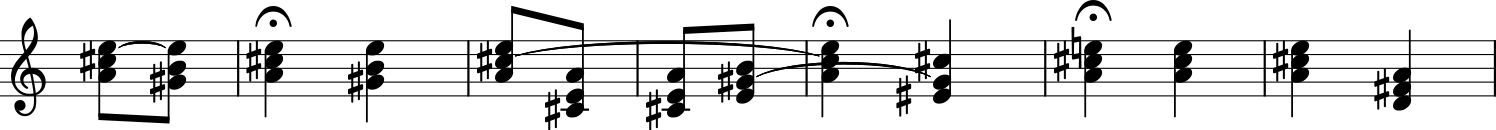

In [15]:
displayPart.show()

Nun wollen wir den Akkorden die jeweilige Stufe von A zuweisen. Dazu erstellen wir zuerst eine Variable mit der Tonart. Anschließend iterieren wir über alle Akkorde, analysieren die Stufe relativ zu A und fügen sie dem Akkord als Text hinzu.

In [16]:
keyA = key.Key('A')
for c in displayPart.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, keyA)
    # print(rn.figure)
    c.addLyric(str(rn.figure))

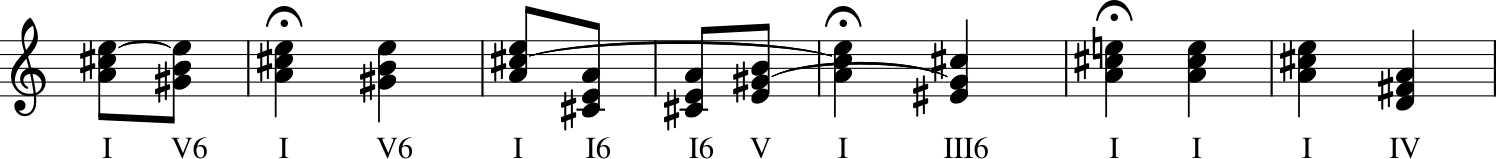

In [17]:
displayPart.show()

Nun können wir noch die Tonart und den Ambitus (in Originallage) jedes Taktes analysieren:

In [18]:
for m in sChords.getElementsByClass('Measure'):
    k = m.analyze('key')
    a = m.analyze('ambitus')
    print('{} {} ({})'.format(m.number, k, a.niceName))

0 E major (Perfect Eleventh)
1 E major (Minor Fourteenth)
2 A major (Major Seventeenth)
3 f# minor (Perfect Eighteenth)
4 E major (Perfect Double-octave)
5 A major (Perfect Twelfth)
6 f# minor (Minor Thirteenth)
7 C# major (Major Thirteenth)
8 F# major (Minor Thirteenth)
9 b minor (Perfect Twelfth)
